# Configs

In [1]:
# FlaML configs

automl_settings = {
    "metric": "roc_auc",
    "task": 'classification',
    "verbose": 1,
    "n_splits": 5,
}

In [2]:
from sklearn.metrics import classification_report, roc_auc_score
from flaml import AutoML

class ModelResults:
    automl: AutoML
    report: str
    roc_auc: float
    y_pred_proba: list

    def __init__(self, automl, report, roc_auc, y_pred_proba, y_test_bin=None):
        self.automl = automl
        self.report = report
        self.roc_auc = roc_auc
        self.y_pred_proba = y_pred_proba
        self.y_test_bin = y_test_bin

def run_automl(X, y, settings, X_test, y_test, bin=None):
    automl = AutoML()
    automl.fit(X, y, **settings)

    y_pred = automl.predict(X_test)
    y_pred_proba = automl.predict_proba(X_test)
    
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

    y_test_bin = y_test if bin is None else (y_test == bin).astype(int)
    
    return ModelResults(automl, report, roc_auc, y_pred_proba, y_test_bin)

# ADULT INCOME

## Data

In [3]:
from libs.paths import PATHS
from libs.pre_processing.training_data import read_data, train_test_split
from libs.pre_processing.pipeline import make_pipeline

Current directory: c:\Users\Alvaro Lima\My Files\Projects\automl-tcc\src
Source path found in current directory.


In [4]:
# Raw data
X, y = read_data(PATHS["ADULT_INCOME"], "income")

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

# Pre-processed data
pipeline = make_pipeline(X_train)
X_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

c:\Users\Alvaro Lima\My Files\Projects\automl-tcc\src\libs\pre_processing\training_data.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path, sep=sep)


## Flaml

### Results

In [5]:
# Pre-processed data results
adultinc_results = run_automl(X_transformed, y_train, automl_settings, X_test_transformed, y_test, ">50K")

c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMCla

# Online Shop

## Data

In [6]:
from libs.paths import PATHS
from libs.pre_processing.training_data import read_data, train_test_split
from libs.pre_processing.pipeline import make_pipeline

In [7]:
# Raw data
X, y = read_data(PATHS["ONLINE_SHOP"], "Revenue")

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

# Pre-processed data
pipeline = make_pipeline(X_train)
X_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

c:\Users\Alvaro Lima\My Files\Projects\automl-tcc\src\libs\pre_processing\training_data.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path, sep=sep)


In [8]:
X.shape, y.shape

((12330, 17), (12330,))

## Flaml

In [9]:
# Pre-processed data results
online_results = run_automl(X_transformed, y_train, automl_settings, X_test_transformed, y_test)

c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMCla

# Bank Telemarketing

## Data

In [10]:
from libs.paths import PATHS
from libs.pre_processing.training_data import read_data, train_test_split
from libs.pre_processing.pipeline import make_pipeline

In [11]:
# Raw data
X, y = read_data(PATHS["BANK_MARKETING"], "y", sep=';')

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

# Pre-processed data
pipeline = make_pipeline(X_train)
X_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [12]:
X.shape, y.shape

((45211, 16), (45211,))

## Flaml

In [13]:
# Pre-processed data results
bank_results = run_automl(X_transformed, y_train, automl_settings, X_test_transformed, y_test, "yes")

c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMCla

# Results

### Best estimators

In [14]:
print("Adult Income Results:\n")
print("Best hyperparameters found: ", adultinc_results.automl.best_config)
print("Best model: ", adultinc_results.automl.model.estimator)
print("Best score: ", adultinc_results.automl.metrics_for_best_config)

print("Raw Data Results:")
print(adultinc_results.report)
print(f"ROC AUC: {adultinc_results.roc_auc:.4f}")

Adult Income Results:

Best hyperparameters found:  {'n_estimators': 141, 'num_leaves': 139, 'min_child_samples': 8, 'learning_rate': np.float64(0.04824748268727149), 'log_max_bin': 9, 'colsample_bytree': 0.5261441571042451, 'reg_alpha': np.float64(0.0028969208338993344), 'reg_lambda': np.float64(0.024463247502165594)}
Best model:  LGBMClassifier(colsample_bytree=0.5261441571042451,
               learning_rate=np.float64(0.04824748268727149), max_bin=511,
               min_child_samples=8, n_estimators=141, n_jobs=-1, num_leaves=139,
               reg_alpha=np.float64(0.0028969208338993344),
               reg_lambda=np.float64(0.024463247502165594), verbose=-1)
Best score:  (np.float64(0.07325839969574766), {'pred_time': 4.5857748011633424e-06})
Raw Data Results:
              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92     11233
        >50K       0.78      0.67      0.72      3420

    accuracy                           0.88     14653
   m

In [15]:
print("Bank Marketing Results:\n")

print("Best hyperparameters found: ", bank_results.automl.best_config)
print("Best model: ", bank_results.automl.model.estimator)
print("Best score: ", bank_results.automl.metrics_for_best_config)

print("Raw Data Results:")
print(bank_results.report)
print(f"ROC AUC: {bank_results.roc_auc:.4f}")

Bank Marketing Results:

Best hyperparameters found:  {'n_estimators': 141, 'num_leaves': 139, 'min_child_samples': 8, 'learning_rate': np.float64(0.04824748268727149), 'log_max_bin': 9, 'colsample_bytree': 0.5261441571042451, 'reg_alpha': np.float64(0.0028969208338993344), 'reg_lambda': np.float64(0.024463247502165594)}
Best model:  LGBMClassifier(colsample_bytree=0.5261441571042451,
               learning_rate=np.float64(0.04824748268727149), max_bin=511,
               min_child_samples=8, n_estimators=141, n_jobs=-1, num_leaves=139,
               reg_alpha=np.float64(0.0028969208338993344),
               reg_lambda=np.float64(0.024463247502165594), verbose=-1)
Best score:  (np.float64(0.0654329837782501), {'pred_time': 3.84223044311371e-06})
Raw Data Results:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     11966
         yes       0.67      0.46      0.54      1598

    accuracy                           0.91     13564
   ma

In [16]:
print("Online Shopping Results:\n")

print("Best hyperparameters found: ", online_results.automl.best_config)
print("Best model: ", online_results.automl.model.estimator)
print("Best score: ", online_results.automl.metrics_for_best_config)

print("Raw Data Results:")
print(online_results.report)
print(f"ROC AUC: {online_results.roc_auc:.4f}")

Online Shopping Results:

Best hyperparameters found:  {'n_estimators': 319, 'max_leaves': 1312, 'min_child_weight': np.float64(0.001), 'learning_rate': np.float64(0.018723798062704217), 'subsample': 0.6890079660561895, 'colsample_bylevel': 0.7551225121854014, 'colsample_bytree': 0.7860755604500558, 'reg_alpha': np.float64(0.17028752704343114), 'reg_lambda': np.float64(1.4375743264564231)}
Best model:  XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.7551225121854014, colsample_bynode=None,
              colsample_bytree=0.7860755604500558, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy='lossguide', importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.018723798062704217), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_del

### ROC AUC Curves

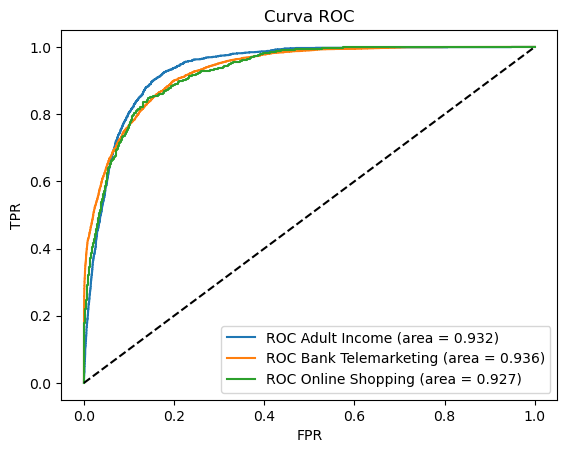

In [19]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Plotando a curva ROC
fpr, tpr, thresholds = roc_curve(adultinc_results.y_test_bin, adultinc_results.y_pred_proba[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(bank_results.y_test_bin, bank_results.y_pred_proba[:, 1])
fpr3, tpr3, thresholds3 = roc_curve(online_results.y_test_bin, online_results.y_pred_proba[:, 1])

plt.figure()
plt.plot(fpr2, tpr2, label=f'ROC Adult Income (area = {adultinc_results.roc_auc:.3f})')
plt.plot(fpr, tpr, label=f'ROC Bank Telemarketing (area = {bank_results.roc_auc:.3f})')
plt.plot(fpr3, tpr3, label=f'ROC Online Shopping (area = {online_results.roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()